Given data of different cyberattacks. The aim to find patterns among the variables of the dataset and build an ML model to predict attack category

In [1]:
# importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In C:\Users\rockr\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\rockr\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\rockr\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Performing Exploratory Data Analysis

Observing the dataset

In [2]:
df = pd.read_csv('Cybersecurity_attacks.csv')
df.shape

(178031, 11)

In [3]:
df.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


In [4]:
df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [5]:
# Spitting the time variable into start time and last time
df[['Start time','Last time']] = df['Time'].str.split('-',expand=True)
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [6]:
df['.'].unique()

array(['.'], dtype=object)

Cleaning the Dataset

In [7]:
# Dropping the time variable since we are able to get start and end time
# Dropping '.' since there is no other value
df = df.drop(['.', 'Time'],axis=1)# Drop columns and make a copy in memory of the object
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


Dealing with NULL values

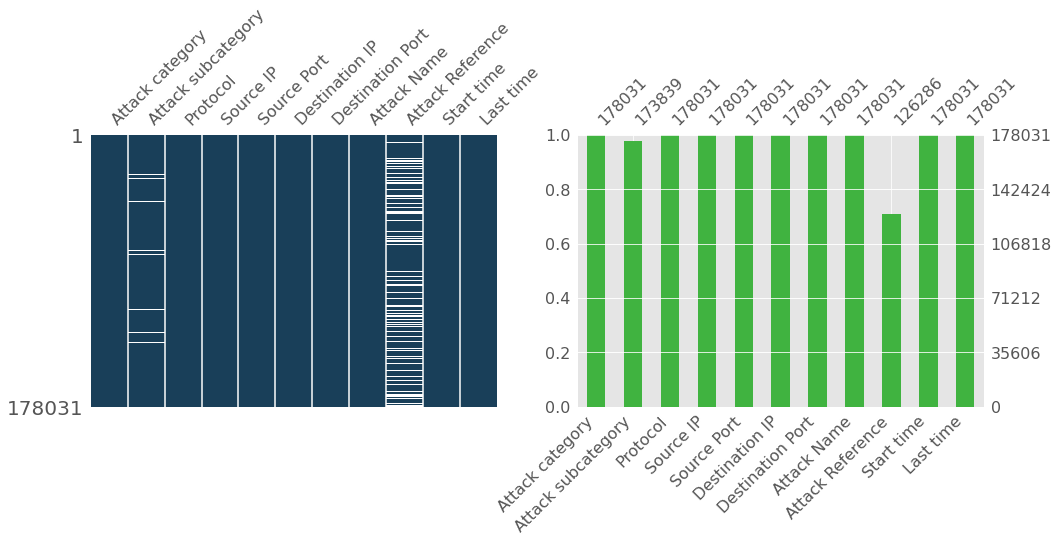

In [8]:
# plot to see if any value is missing
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [9]:
# Here we can see that some attack category values are missing and a lot attack reference values are missing

In [10]:
df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [11]:
# filling all the attack subcategory values which are null to Not Registered
df["Attack subcategory"] = df["Attack subcategory"].fillna("Not Registered")

# filling all the attack Reference values which are null to Not Found
df["Attack Reference"] = df["Attack Reference"].fillna("Not Found")

In [12]:
df.isnull().sum()

Attack category       0
Attack subcategory    0
Protocol              0
Source IP             0
Source Port           0
Destination IP        0
Destination Port      0
Attack Name           0
Attack Reference      0
Start time            0
Last time             0
dtype: int64

In [13]:
# Now all the null values are dealt with

Removing the duplicates

In [14]:
df[df.duplicated()].shape

(6, 11)

In [15]:
# 6 rows are duplicated

In [16]:
print('Dimensions before dropping duplicated rows: ' + str(df.shape))
df = df.drop(df[df.duplicated()].index)
print('Dimensions after dropping duplicated rows: ' + str(df.shape))

Dimensions before dropping duplicated rows: (178031, 11)
Dimensions after dropping duplicated rows: (178025, 11)


Removing invalid port Addresses - Port address can be from 0 to 65535

In [17]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]
# These are the data with invalid port number

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,Not Found,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,Not Found,1424223172,1424223172
174352,Fuzzers,RIP,udp,175.45.176.0,67830,149.171.126.13,520,Fuzzer: RIP Entry Routetag (https://strikecent...,Not Found,1424232695,1424232695
174353,DoS,Miscellaneous,unas,175.45.176.1,77531,149.171.126.10,0,Microsoft Windows IP Options Off-By-One (https...,CVE 2005-0048 (http://cve.mitre.org/cgi-bin/cv...,1424237378,1424237378
174354,Backdoor,Not Registered,ospf,175.45.176.0,70728,149.171.126.17,0,HP Performance Manager Tomcat Bypass (https://...,CVE 2009-3548 (http://cve.mitre.org/cgi-bin/cv...,1424256513,1424256571
174355,Reconnaissance,ICMP,kryptolan,175.45.176.1,77303,149.171.126.10,0,IP Options: Basic Security (IP Option 2) (http...,Not Found,1424237323,1424237323
174356,Shellcode,Windows,udp,175.45.176.3,67292,149.171.126.15,24107,Shellcode: Windows x86 Add User - metasploit (...,Not Found,1424226864,1424226864


In [18]:
df = df[~(invalid_SP | invalid_DP)].reset_index(drop=True)

In [19]:
df.shape

(174341, 11)

In [20]:
df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

In [21]:
# we can see 'Reconnaissance' and 'Backdoor' is repeated because of space and plurals uses

In [22]:
df['Attack category'] = df['Attack category'].str.upper().str.strip()   # strip is used to remove spaces
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')

In [23]:
df['Attack Reference'] = df['Attack Reference'].str.replace('-','Not Found')

In [24]:
df['Protocol'].unique()

array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

In [25]:
# Same in Protocol many has been repeated because of lowercase Uppercase value

In [26]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()

In [27]:
print('Total number of different protocols:', len(df['Protocol'].unique()))
print('Total number of different Attack categories:', len(df['Attack category'].unique()))

Total number of different protocols: 129
Total number of different Attack categories: 9


Taking new Dataset which contains Service of TCP corresponding to port number

In [28]:
tcp_ports = pd.read_csv('TCP-ports.csv')
tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry


In [29]:
# Merging both the dataset based on destination port = port
print('Dimensions before merging dataframes: ' ,(df.shape))

newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
newdf = newdf.rename(columns={'Service':'Destination Port Service'})
newdf = newdf.drop(['Port'], axis = 1)

print('Dimensions after merging dataframes: ' + str(newdf.shape))

Dimensions before merging dataframes:  (174341, 11)
Dimensions after merging dataframes: (174341, 12)


Analizing the dataset and finding the pattern

In [30]:
newdf['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

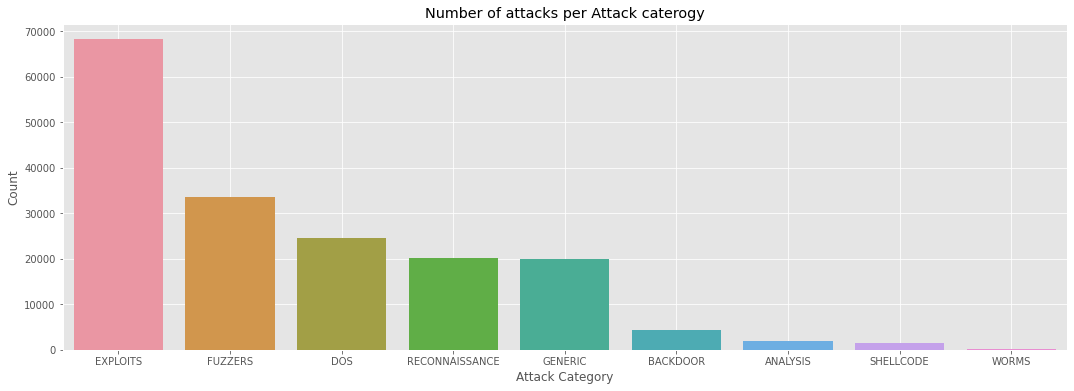

In [31]:
plt.figure(figsize=(18,6))
sns.barplot(x=newdf['Attack category'].value_counts().index,y=newdf['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
plt.grid(True)

In [32]:
pd.DataFrame(newdf['Attack category'].value_counts())[:]

,Attack category
EXPLOITS,68211
FUZZERS,33638
DOS,24582
RECONNAISSANCE,20136
GENERIC,19860
BACKDOOR,4353
ANALYSIS,1881
SHELLCODE,1511
WORMS,169


In [33]:
a= pd.DataFrame(newdf['Attack category'].value_counts())[:6]

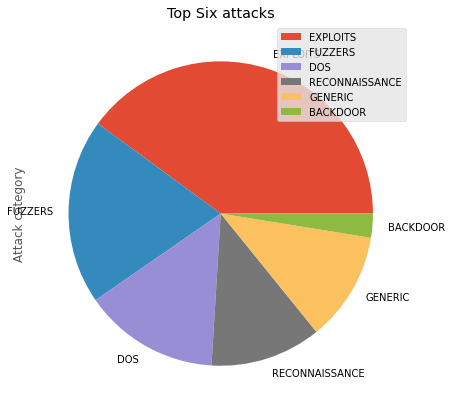

In [34]:
a.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title('Top Six attacks')
plt.legend(loc='left')
plt.show()

# ANALYSING ATTACKS WITH DATE AND TIME

In [35]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,Not Found,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002Not Found0573 (http://cve.mitre.org/cg...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005Not Found4560 (http://cve.mitre.org/cg...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011Not Found1729 (http://cve.mitre.org/cg...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001Not Found0537 (http://cve.mitre.org/cg...,1421927418,1421927418


In [36]:
# Creating a new Dataset 'newdf' changing format of time and date and also adding a duration column
newdf['Start time'] = pd.to_datetime(newdf['Start time'], unit='s')
newdf['Last time'] = pd.to_datetime(newdf['Last time'], unit='s')
newdf['Duration'] = ((newdf['Last time'] - newdf['Start time']).dt.seconds).astype(int)

In [37]:
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Port Service,Duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,Not Found,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002Not Found0573 (http://cve.mitre.org/cg...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005Not Found4560 (http://cve.mitre.org/cg...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011Not Found1729 (http://cve.mitre.org/cg...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001Not Found0537 (http://cve.mitre.org/cg...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0


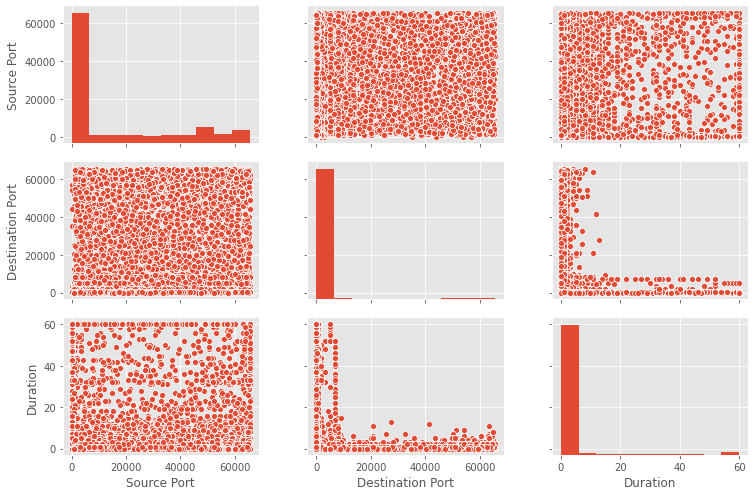

In [38]:
g = sns.pairplot(newdf)
g.fig.set_size_inches(11,7)
plt.show()

In [39]:
newdf['Destination IP'].value_counts()

149.171.126.17    43199
149.171.126.10    24002
149.171.126.19    21619
149.171.126.13    20464
149.171.126.18    13301
149.171.126.14    12195
149.171.126.12    11970
149.171.126.15    10555
149.171.126.11     9444
149.171.126.16     7592
Name: Destination IP, dtype: int64

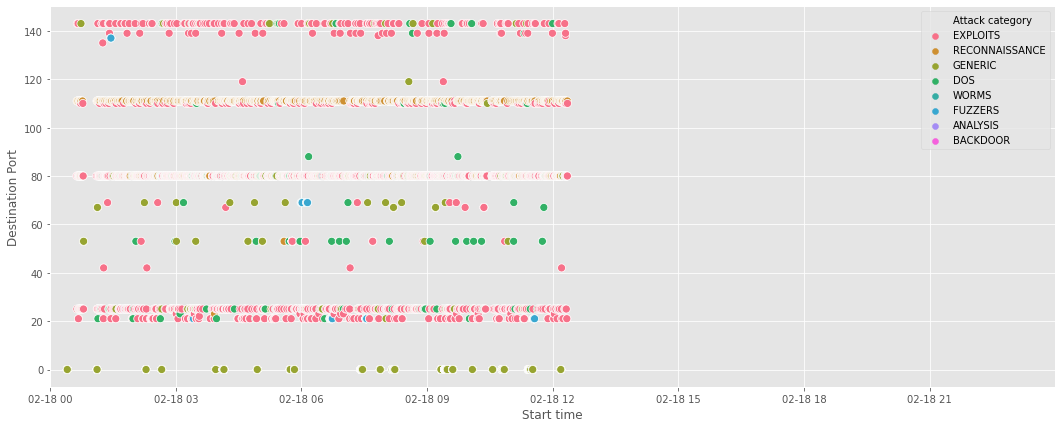

In [40]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', 
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)], 
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 23:59:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

# ANALYSING ATTACKS WITH DURATION AND DESTINATION PORT

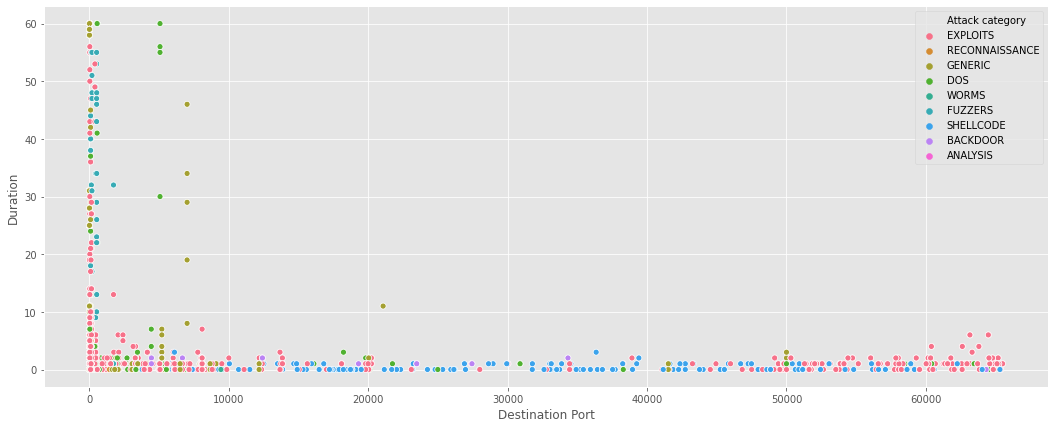

In [41]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category', data=newdf[newdf['Destination IP']=='149.171.126.17'])
plt.grid(True)
plt.show()

In [42]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(18,8))
    ax = sns.heatmap(df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [43]:
df_pivot = newdf.copy()
df_pivot['hour'] = df_pivot.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)

In [44]:
df_pivot.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Port Service,Duration,hour
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,Not Found,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2,11:00:00
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002Not Found0573 (http://cve.mitre.org/cg...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0,11:00:00
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005Not Found4560 (http://cve.mitre.org/cg...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0,11:00:00
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011Not Found1729 (http://cve.mitre.org/cg...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0,11:00:00
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001Not Found0537 (http://cve.mitre.org/cg...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0,11:00:00


In [45]:
df_p1 = pd.pivot_table(df_pivot,values='Attack Name', index=['hour'], columns=['Attack category'], aggfunc='count')
df_p1

Attack category,ANALYSIS,BACKDOOR,DOS,EXPLOITS,FUZZERS,GENERIC,RECONNAISSANCE,SHELLCODE,WORMS
hour,,,,,,,,,
00:00:00,3,16,127,543,391,60,177,20,3
01:00:00,186,1148,2640,6716,4477,1748,1804,105,14
02:00:00,71,100,630,2861,1983,1031,1023,113,10
03:00:00,226,60,3755,9759,2743,1513,2727,113,17
04:00:00,64,87,617,2776,2090,1349,1034,115,10
05:00:00,198,645,3038,9368,2536,1834,1750,111,15
06:00:00,84,90,637,2968,2065,994,1010,116,9
07:00:00,179,578,3390,6151,2413,2076,1846,116,15
08:00:00,73,111,664,2938,2048,1081,1010,107,11


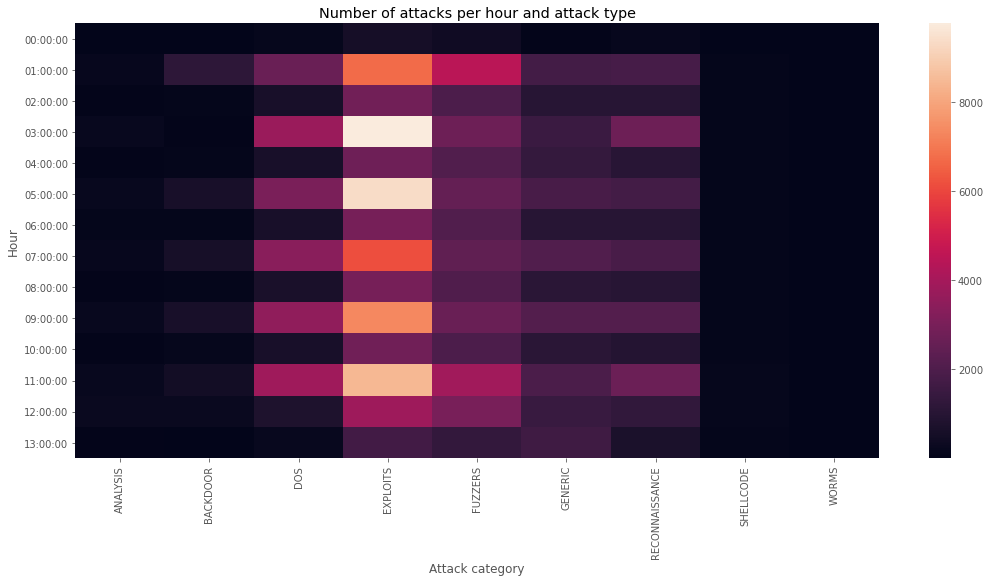

In [46]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'Number of attacks per hour and attack type')

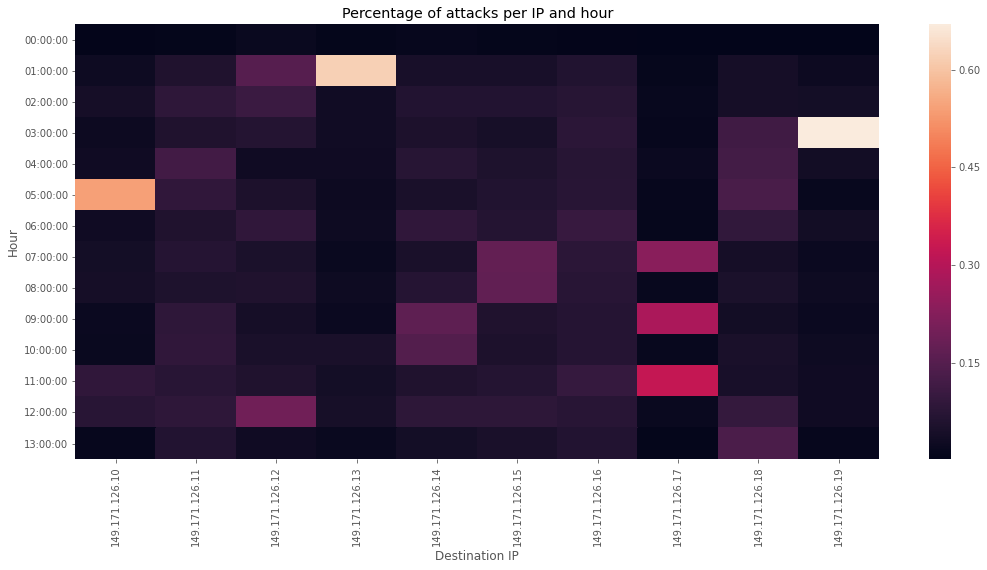

In [47]:
df_p2 = pd.pivot_table(df_pivot, values='Attack Name', index=['hour'], columns=['Destination IP'], aggfunc='count')
heatmap_graph(df = df_p2/df_p2.sum(), xlabel = 'Destination IP', ylabel = 'Hour', title = 'Percentage of attacks per IP and hour')

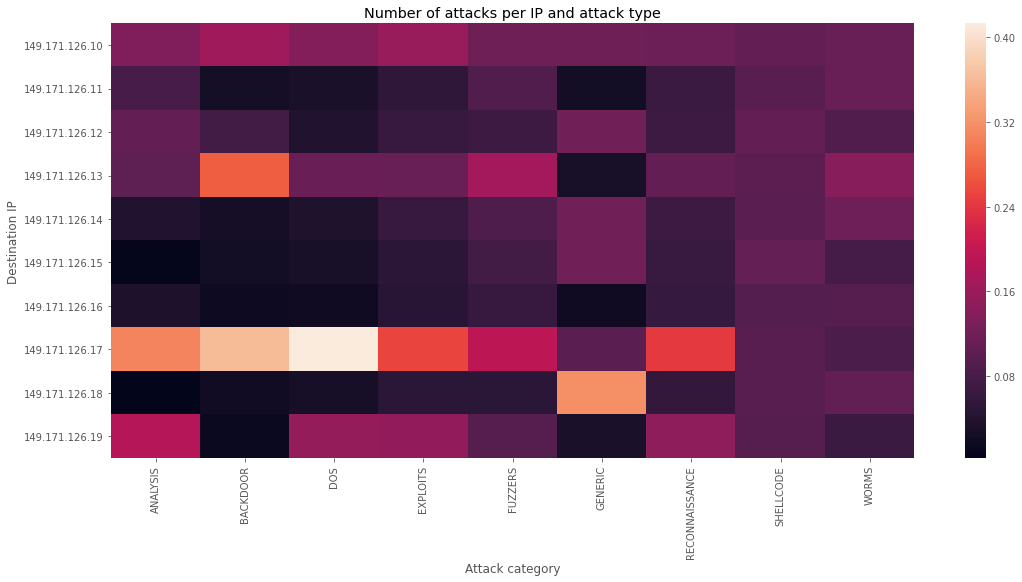

In [48]:
df_p3 = pd.pivot_table(df_pivot, values='Attack Name', index=['Destination IP'], columns=['Attack category'], aggfunc='count')
heatmap_graph(df = df_p3/df_p3.sum(), xlabel = 'Attack category', ylabel = 'Destination IP', title = 'Number of attacks per IP and attack type')

In [49]:
df_crosstab = pd.crosstab(newdf['Attack category'], newdf['Destination Port'])
df_crosstab

Destination Port,0,10,21,22,23,25,31,42,53,67,...,65455,65460,65470,65479,65486,65497,65502,65511,65517,65535
Attack category,,,,,,,,,,,,,,,,,,,,,
ANALYSIS,1442,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BACKDOOR,4000,0,7,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DOS,20825,4,75,0,13,425,0,0,154,33,...,0,0,0,0,0,0,0,0,0,0
EXPLOITS,40143,0,2198,14,135,4412,0,21,209,98,...,2,2,2,2,2,4,2,2,2,0
FUZZERS,13355,0,758,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GENERIC,2612,0,26,6,0,427,0,0,13438,54,...,0,0,0,0,0,0,0,0,0,6
RECONNAISSANCE,8324,0,0,0,7,7,0,0,41,0,...,0,0,0,0,0,0,0,0,0,0
SHELLCODE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WORMS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


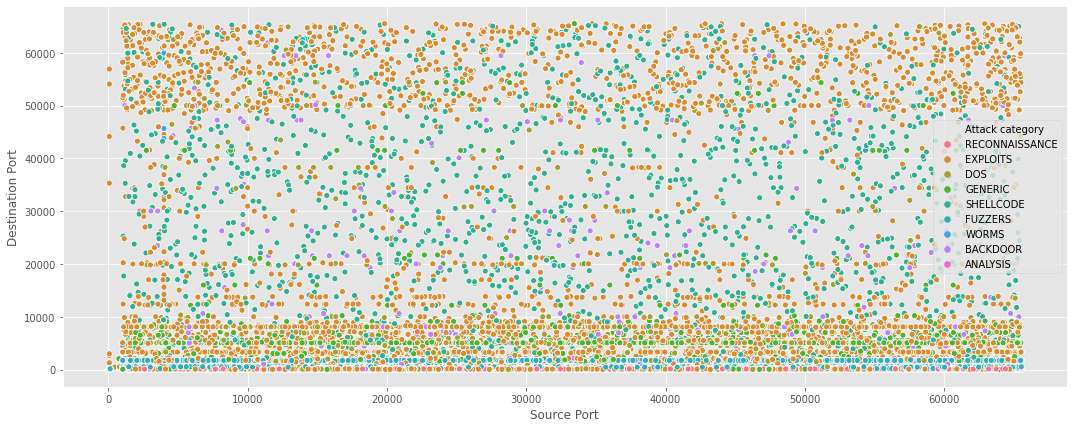

In [50]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Source Port',y='Destination Port', hue='Attack category',data=newdf)
plt.show()

A certain pattern can be seen in the graph, in which attacks usually occur on ports less than 10,000 or greater than 50,000, except for shellcode-type attacks, as we had anticipated in the hypothesis test.

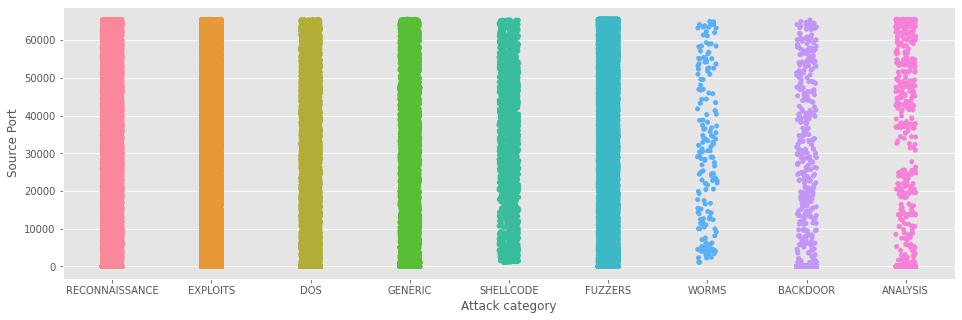

In [51]:
# Source ports
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Source Port',data=newdf)
plt.show()

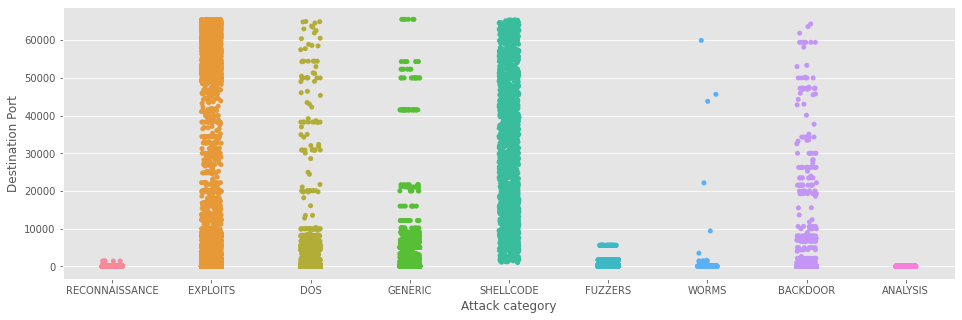

In [52]:
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Destination Port',data=newdf)
plt.show()

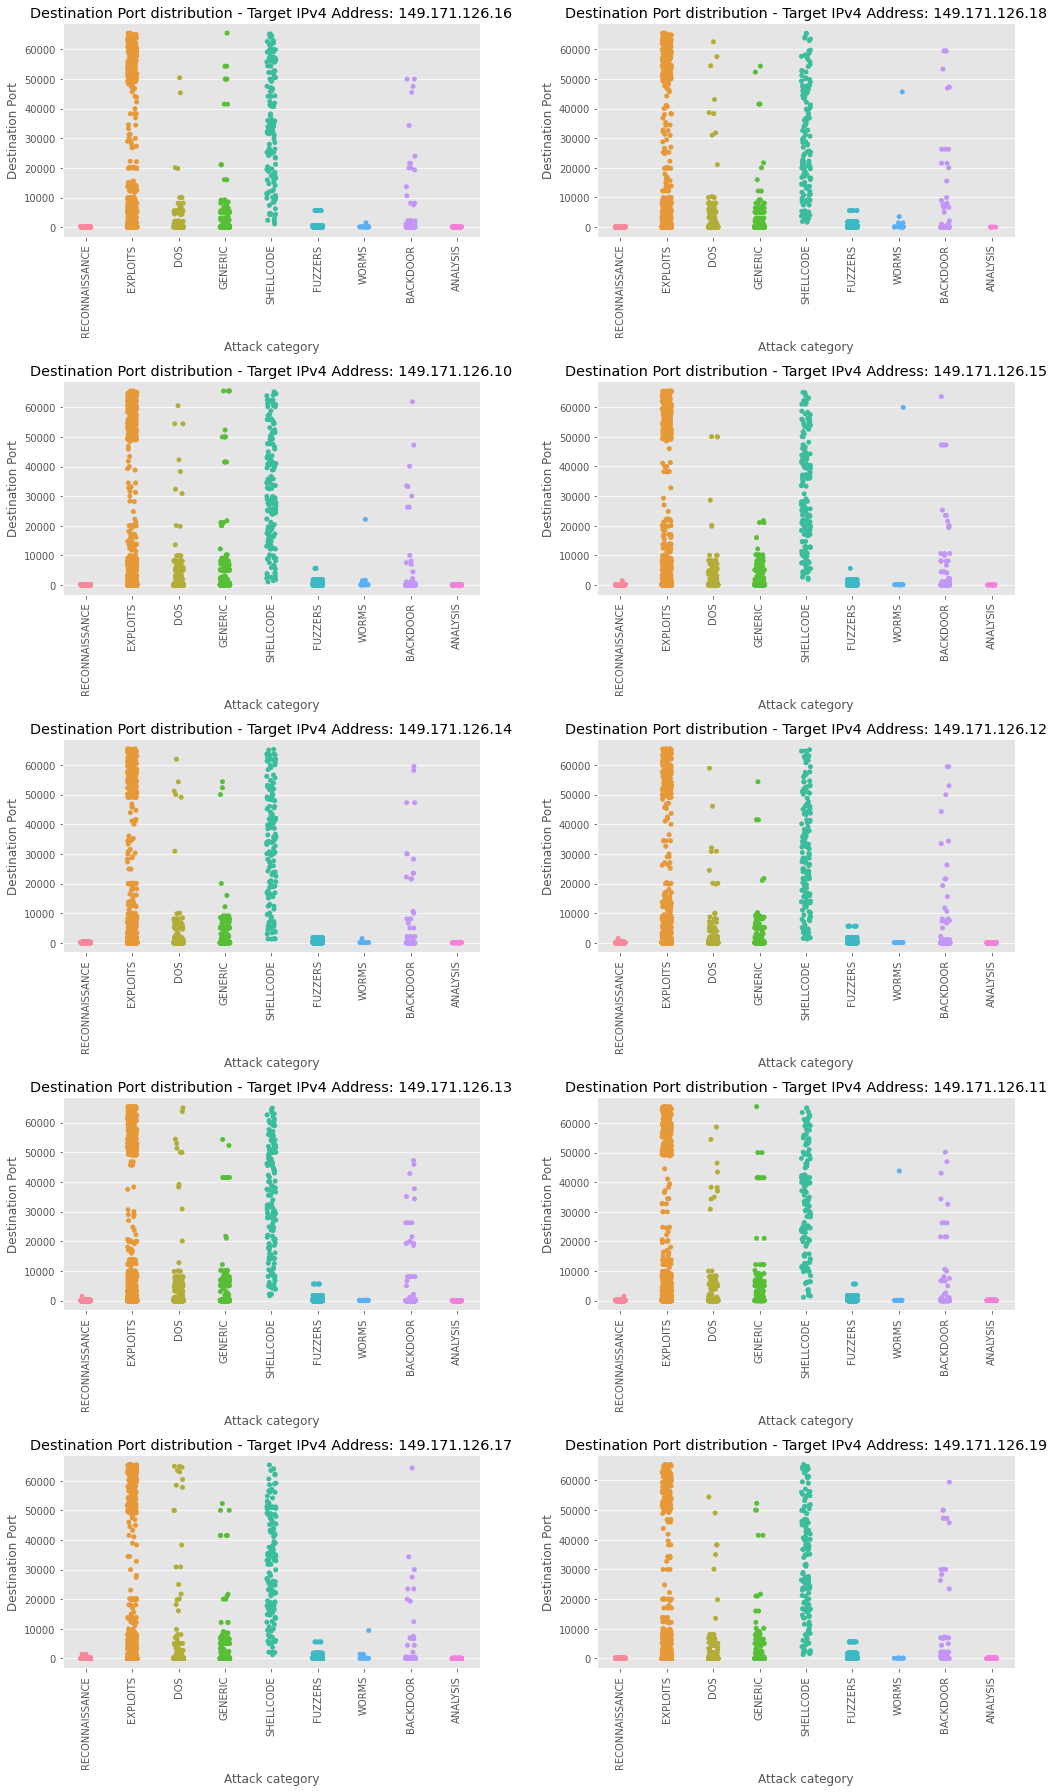

In [53]:
ips = list(newdf['Destination IP'].unique())
f, axes = plt.subplots(5, 2)
f.set_figheight(25)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())

for i, ip in enumerate(ips):
    sns.stripplot(x='Attack category',y='Destination Port',data=newdf[newdf['Destination IP'] == ip], order=labels, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_xlabel('Attack category')
    axes[int(i/2)][i%2].set_ylabel('Destination Port')
    axes[int(i/2)][i%2].set_title('Destination Port distribution - Target IPv4 Address: ' + ip)
    axes[int(i/2)][i%2].set_xticklabels(labels,rotation=90)
plt.tight_layout()
plt.show()

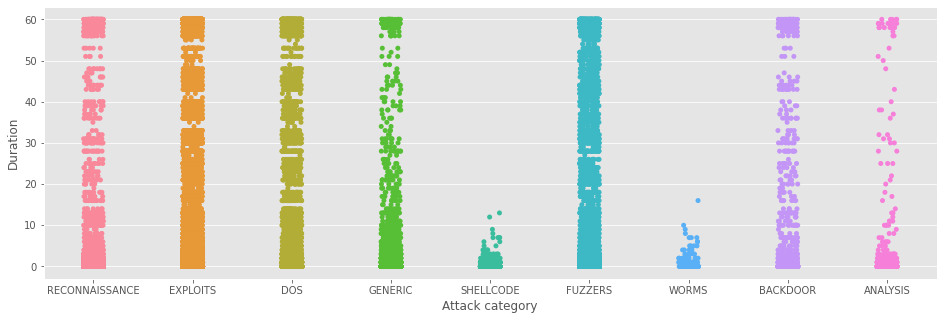

In [54]:
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Duration',data=newdf)
plt.show()

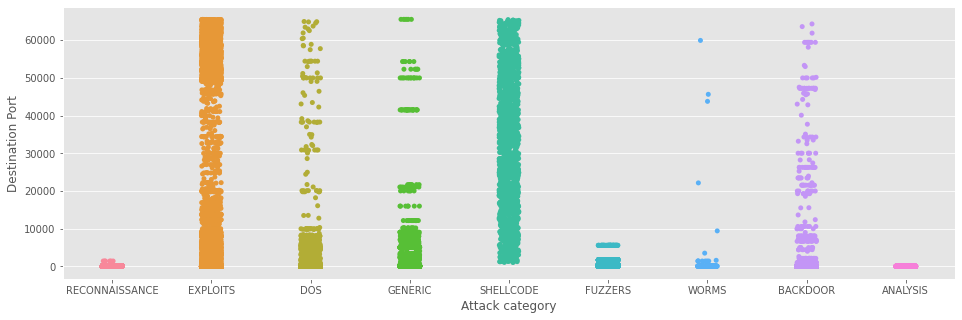

In [55]:
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Destination Port',data=newdf)
plt.show()

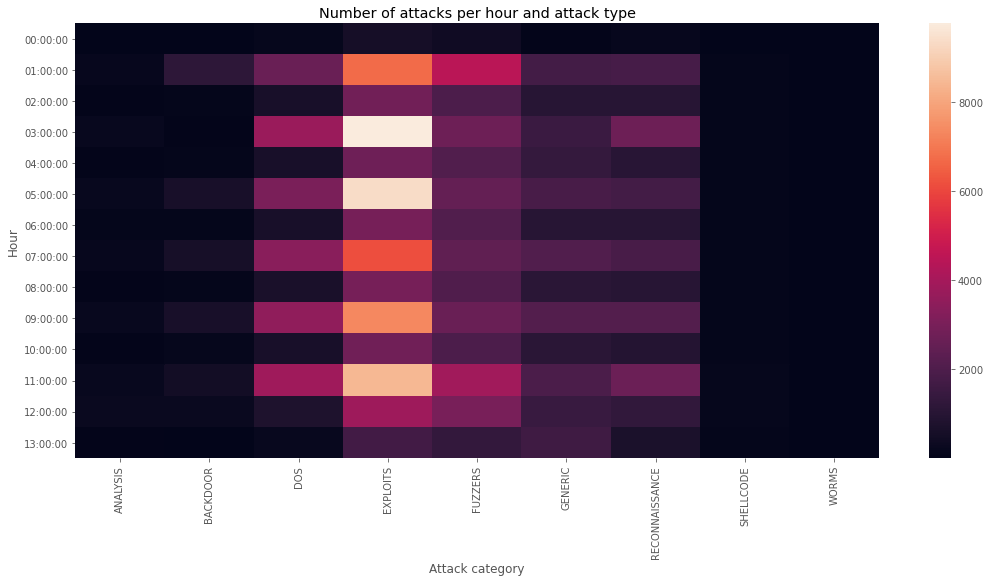

In [56]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'Number of attacks per hour and attack type')

In [57]:
df_pivot.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Port Service,Duration,hour
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,Not Found,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2,11:00:00
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002Not Found0573 (http://cve.mitre.org/cg...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0,11:00:00
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005Not Found4560 (http://cve.mitre.org/cg...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0,11:00:00
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011Not Found1729 (http://cve.mitre.org/cg...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0,11:00:00
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001Not Found0537 (http://cve.mitre.org/cg...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0,11:00:00


Therefore, The attack category depends upon Destination Port, Duration of Attack and hour of the Attack
So, we will make our model with these variables

# BUILDING ML MODEL

In [173]:
ml_dataset = df_pivot.copy()

In [174]:
ml_dataset = ml_dataset.drop(['Attack subcategory', 'Protocol', 'Source IP', 'Source Port', 'Attack Name',  'Attack Reference', 'Start time', 'Last time', 'Destination Port Service' ], axis = 1)

In [175]:
ml_dataset.head(5)

,Attack category,Destination IP,Destination Port,Duration,hour
0,RECONNAISSANCE,149.171.126.16,80,2,11:00:00
1,EXPLOITS,149.171.126.18,32780,0,11:00:00
2,EXPLOITS,149.171.126.16,80,0,11:00:00
3,EXPLOITS,149.171.126.16,5555,0,11:00:00
4,EXPLOITS,149.171.126.10,80,0,11:00:00


In [176]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
ml_dataset['Destination IP']= le.fit_transform(ml_dataset['Destination IP'])
ml_dataset['hour']= le.fit_transform(ml_dataset['hour'])

In [177]:
ml_dataset.head()

,Attack category,Destination IP,Destination Port,Duration,hour
0,RECONNAISSANCE,6,80,2,11
1,EXPLOITS,8,32780,0,11
2,EXPLOITS,6,80,0,11
3,EXPLOITS,6,5555,0,11
4,EXPLOITS,0,80,0,11


In [178]:
X = ml_dataset.iloc[:, 1:].values
y = ml_dataset.iloc[:, 0].values

In [179]:
X

array([[    6,    80,     2,    11],
       [    8, 32780,     0,    11],
       [    6,    80,     0,    11],
       ...,
       [    8,   111,     1,    12],
       [    0,    53,     0,    12],
       [    7,   110,     1,    12]], dtype=int64)

In [180]:
y

array(['RECONNAISSANCE', 'EXPLOITS', 'EXPLOITS', ..., 'RECONNAISSANCE',
       'GENERIC', 'EXPLOITS'], dtype=object)

In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [182]:
y

array([6, 3, 3, ..., 6, 5, 3])

In [183]:
X

array([[    6,    80,     2,    11],
       [    8, 32780,     0,    11],
       [    6,    80,     0,    11],
       ...,
       [    8,   111,     1,    12],
       [    0,    53,     0,    12],
       [    7,   110,     1,    12]], dtype=int64)

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [210]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)

  
# creating a confusion matrix
predictions = clf.predict(X_test) 
cm = confusion_matrix(y_test, predictions)
accuracy =  accuracy_score(y_test, predictions)

In [211]:
print(metrics.classification_report(y_test, predictions, digits=3));

              precision    recall  f1-score   support

           0      0.302     0.247     0.272       372
           1      0.125     0.148     0.136       870
           2      0.197     0.063     0.095      4847
           3      0.514     0.767     0.616     13699
           4      0.886     0.580     0.701      6708
           5      0.827     0.749     0.786      3999
           6      0.907     0.469     0.618      3999
           7      0.378     0.920     0.536       338
           8      0.012     0.216     0.023        37

    accuracy                          0.577     34869
   macro avg      0.461     0.462     0.420     34869
weighted avg      0.609     0.577     0.562     34869



In [215]:
cm

array([[   92,    54,     9,   215,     1,     1,     0,     0,     0],
       [    1,   129,    49,   674,     5,     2,     2,     7,     1],
       [   17,   185,   303,  4068,    68,   100,    32,    15,    59],
       [  115,   413,   831, 10509,   328,   444,   140,   483,   436],
       [   38,   172,   138,  2384,  3888,    34,    13,     0,    41],
       [   25,    33,    79,   747,    54,  2995,     6,     4,    56],
       [   16,    39,   122,  1803,    44,    37,  1875,     0,    63],
       [    0,     3,     3,    14,     0,     4,     0,   311,     3],
       [    1,     0,     1,    16,     2,     6,     0,     3,     8]],
      dtype=int64)

In [216]:
ml_dataset['Attack category'].value_counts()*0.2

EXPLOITS          13642.2
FUZZERS            6727.6
DOS                4916.4
RECONNAISSANCE     4027.2
GENERIC            3972.0
BACKDOOR            870.6
ANALYSIS            376.2
SHELLCODE           302.2
WORMS                33.8
Name: Attack category, dtype: float64

In [219]:
clf.predict([[2, 90, 0, 0]])

array([2])

In [221]:
le.inverse_transform(clf.predict([[2, 90, 0, 0]]))

array(['DOS'], dtype=object)